<a href="https://colab.research.google.com/github/Dheemant-Dixit/WoC-ML-Bootcamp/blob/main/KMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.options.display.max_columns = 5
df_train = pd.read_csv('/content/drive/MyDrive/WoC-ML Bootcamp/Logistic Regression/emnist-letters-train.csv', header = None)
df_train.head()

,0,1,...,783,784
0,23,0,...,0,0
1,7,0,...,0,0
2,16,0,...,0,0
3,15,0,...,0,0
4,23,0,...,0,0


In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/WoC-ML Bootcamp/Logistic Regression/emnist-letters-test.csv', header = None)
df_test.head()

,0,1,...,783,784
0,1,0,...,0,0
1,1,0,...,0,0
2,1,0,...,0,0
3,1,0,...,0,0
4,1,0,...,0,0


In [ ]:
alphabets=np.array(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'])

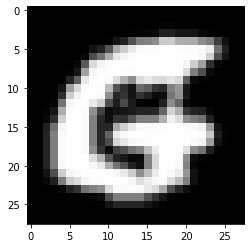

In [ ]:
n=df_train.shape[1]
pixels=(df_train.iloc[1:2,1:n]).to_numpy()
pixels = pixels.reshape((28, 28))
pixels = pixels.T
plt.imshow(pixels, cmap='gray')
plt.show()

In [ ]:
X_train = df_train.to_numpy()
Y_train = X_train[:, 0]
Y_train = Y_train.reshape(Y_train.shape[0],1)
X_train = X_train[:, 1:X_train.shape[1]]

In [ ]:
X_test = df_test.to_numpy()
Y_test = X_test[:, 0]
Y_test = Y_test.reshape(Y_test.shape[0],1)
X_test = X_test[:, 1:X_test.shape[1]]

In [ ]:
def plot(X):
    pixels = X.reshape((28, 28))
    pixels = pixels.T
    plt.imshow(pixels, cmap='gray')
    plt.show()

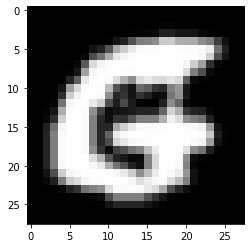

This is G


In [ ]:
n=X_train.shape[1]
a = 1
pixels= X_train[a:a+1, :]
plot(pixels)
print('This is', alphabets[Y_train[a]-1][0])

In [ ]:
def normalise(X):
    result = X/255
    return result

In [ ]:
def euclidean_distance(Centroid, X):
    a = np.square(X - Centroid)
    a = np.sum(a, axis=1)
    a = np.sqrt(a)
    return a.T

In [ ]:
K = len(np.unique(Y_train))

In [ ]:
Centroid = np.empty((K, X_train.shape[1]))
for i in range(K):
    co = np.random.randint(0, X_train.shape[0])
    Centroid[i] = X_train[co]

In [ ]:
no_of_iter = 50
for i in range(no_of_iter):
    distance = np.empty((X_train.shape[0], 0))
    for k in range(K):
        distance = np.c_[distance, euclidean_distance(Centroid[k].reshape(1, Centroid.shape[1]), X_train)]
    ind = np.argmin(distance, axis=1)
    ind = ind.reshape(-1,1)

    l = np.c_[np.array(range(X_train.shape[0])), ind]

    for k in range(K):
        # a = np.where(l[:, 1].reshape(l.shape[0],1)==K, X_train[l[:, 0]], np.zeros((1, X_train.shape[1])))
        a = np.empty((0, X_train.shape[1]))
        for j in range(X_train.shape[0]):
            if ind[j]==k:
                a = np.vstack((a, X_train[j]))
        Centroid[k] = np.mean(a, axis=0)

    print(Centroid[7])

Streaming output truncated to the last 5000 lines.
 1.49769776e+02 9.37157615e+01 3.97739079e+01 9.46280992e+00
 1.31670602e+00 1.77390791e-01 3.54191263e-03 0.00000000e+00
 0.00000000e+00 1.03305785e-02 7.43211334e-01 4.98347107e+00
 1.57411452e+01 4.51906730e+01 9.59952774e+01 1.49749410e+02
 1.71270661e+02 1.55463991e+02 1.32709268e+02 1.25355667e+02
 1.24800472e+02 1.18569953e+02 1.04626623e+02 9.29693034e+01
 9.34542503e+01 1.15555490e+02 1.54365112e+02 1.76171488e+02
 1.50193329e+02 9.43494687e+01 4.06168831e+01 9.90230224e+00
 1.46723731e+00 1.77685950e-01 3.54191263e-03 0.00000000e+00
 0.00000000e+00 7.96930342e-03 7.29338843e-01 4.70100354e+00
 1.40404368e+01 3.99805195e+01 8.59911452e+01 1.35064935e+02
 1.58443625e+02 1.51775974e+02 1.38348878e+02 1.32381051e+02
 1.28344746e+02 1.16877214e+02 1.01077922e+02 8.93373672e+01
 9.13597993e+01 1.15939197e+02 1.57395809e+02 1.80114227e+02
 1.52724321e+02 9.54383117e+01 4.14436246e+01 1.04958678e+01
 1.80696576e+00 2.53246753e-01 5.0

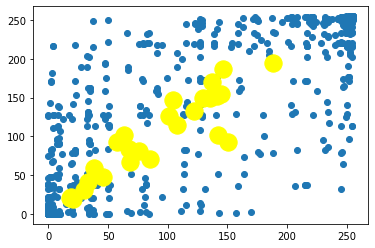

In [ ]:
plt.scatter(X_train[25000:26000, 259], X_train[25000:26000, 260])
plt.scatter(Centroid[:,259],Centroid[:,260],s=300,c='yellow',label='Centroids')